<a href="https://colab.research.google.com/github/fengivan/382L-HW6/blob/main/HW6Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=np.inf)
plt.rcParams['figure.figsize'] = [10, 10]

Delta X
0.04

Delta T
0.001

U
[0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
 
V
[3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416 3.1416]
 


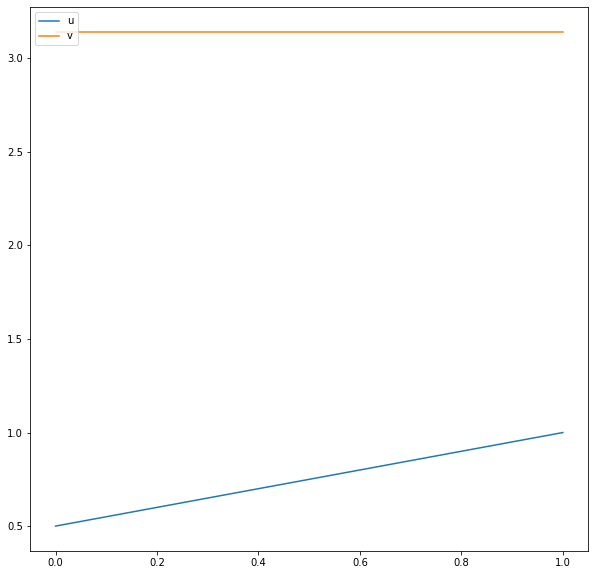

In [65]:
#initial conditions
deltax=1/25
deltat=.001
u = np.zeros(26)
v = np.zeros(26)
for i in range(0,26):
  u[i]=(deltax*i+1)/2
  v[i]=np.pi

print("Delta X")
print(deltax)
print("")
print("Delta T")
print(deltat)
print("")
print("U")
print(np.around((u),4))
print(" ")
print("V")
print(np.around((v),4))
print(" ")

x = np.linspace(0, 1, 26)
plt.plot( x,u, label="u")
plt.plot( x,v, label="v")
plt.legend(loc="upper left")
plt.show()

In [66]:
def buildABU(u, v):     #build A matrix and b vector for solving U(n+1)
  B=np.zeros(26)
  B[0]=.5
  matrix=np.zeros((26,26))
  matrix[0][0]=1
  for i in range(1, 25):
    a=-v[i]**2/(deltax**2)
    b=2*v[i]**2/(deltax**2)+1/deltat-2*v[i]*(v[i]-v[i-1])/(deltax**2)+v[i]-u[i]
    c=-v[i]**2/(deltax**2)+2*v[i]*(v[i]-v[i-1])/(deltax**2)
    matrix[i][i-1]=c
    matrix[i][i]=b
    matrix[i][i+1]=a
    B[i]=10+u[i]/deltat

  matrix[25,25]=1
  matrix[25,24]=-1
  B[25]=deltax/2-deltax*np.sin(u[25]*v[25])
  return matrix, B

In [67]:
def buildABV(u, v):         #build A matrix and b vector for solving V(n+1)
  B=np.zeros(26)
  B[0]=np.pi
  matrix=np.zeros((26,26))
  matrix[0][0]=1
  for i in range(1, 25):
    a=-u[i]**2/(deltax**2)
    b=2*u[i]**2/(deltax**2)+1/deltat-2*u[i]*(u[i]-u[i-1])/(deltax**2)+v[i]-u[i]
    c=-u[i]**2/(deltax**2)+2*u[i]*(u[i]-u[i-1])/(deltax**2)
    matrix[i][i-1]=c
    matrix[i][i]=b
    matrix[i][i+1]=a
    B[i]=(u[i+1]-2*u[i]+u[i-1])/(deltax**2)+v[i]/deltat

  matrix[25,25]=1
  matrix[25,24]=-1
  B[25]=deltax*(1+np.cos(u[25]*v[25]))
  return matrix, B

Time
0.10000000000000007

U
[0.5    0.5587 0.622  0.6884 0.7562 0.8241 0.8912 0.9568 1.0203 1.0813 1.1397 1.1952 1.2479 1.2977 1.3446 1.3886 1.4299 1.4685 1.5045 1.5381 1.5692 1.5981 1.6248 1.6494 1.6721 1.693 ]
 
V
[3.1416 2.9821 2.8765 2.8095 2.7702 2.7514 2.7477 2.7556 2.7725 2.7966 2.8264 2.8613 2.9004 2.9432 2.9895 3.0391 3.0917 3.1472 3.2057 3.2671 3.3314 3.3986 3.4689 3.5423 3.6189 3.6989]
 


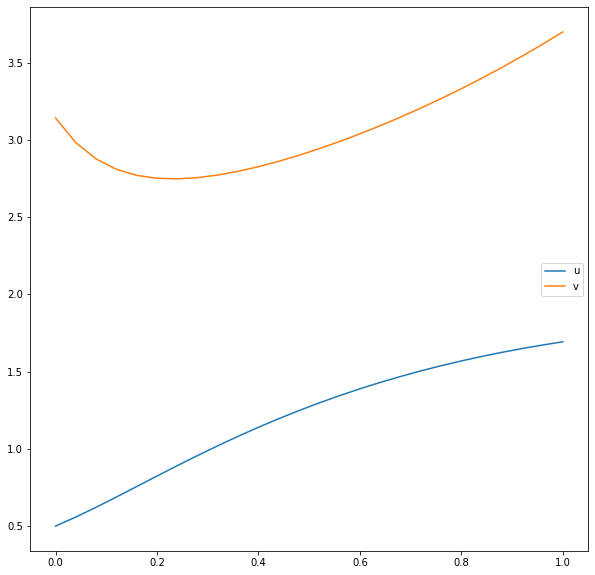

In [68]:
time=0
#itereate through all timesteps
for i in range(0,100):
  time=time+deltat
  A, b = buildABU(u,v)      
  u=np.linalg.solve(A,b)      #solve for u at n+1
  A, b = buildABV(u,v)
  v=np.linalg.solve(A,b)      #solve for v at n+1

print("Time")
print(time)
print("")
print("U")
print(np.around((u),4))
print(" ")
print("V")
print(np.around((v),4))
print(" ")

x = np.linspace(0, 1, 26)
plt.plot( x,u, label="u")
plt.plot( x,v, label="v")
plt.legend(loc="right")
plt.show()